## Data Analysis with Python: Zero to Pandas - Course Project

# SuperMarket Sales - EDA 

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.
This dataset contains Supermarket sales records of a supermarket which has 3 Branches - A, B and C in three different cities - Mandalay, Yangon, Naypyitaw of Country Myanmar. There are 1000 records of customer purchases done in a time period of 3 months.  

In this dataset there are columns. They are described below :-
1. Invoice_ID - ID for the purchase done by customer
2. Branch - Branch of SuperMarket
3. City - City in which super market is located
4. Customer_type - IF customer is a member or not 
6. Gender - Gender of customer
7. Product_line - General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
8. Unit_price - Price of single piece of product
9. Quantity - No. of Products purchased
10. Tax_5% - Tax of 5% applied on product price for customer buying
11. Total - Total Price(Tax + Unit Price*Quantity)
12. Date - Date of Purchase
13. Time - Time of Purchase (10AM to 9PM)
14. Payment - Payment method (3 methods are available – Cash, Credit card and Ewallet)
15. cogs - Cost of goods sold
16. gross_margin_percentage 
17. gross_income
18. Rating - Rating given by customer ( Out of 10)

## Downloading the Dataset

Here is this section, It is shown how to download a dataset from internet and upload it for cleaning and analysis.

In [16]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [17]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?resource=download' 

In [18]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./supermarket-sales" (use force=True to force download)


The dataset has been downloaded and extracted.

In [19]:
# Change this
data_dir = './supermarket-sales'

In [20]:
import os
os.listdir(data_dir)

['supermarket_sales - Sheet1.csv']

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let us save and upload our work to Jovian before continuing.

In [22]:
project_name = "zerotopandas-course-project-supermarket_sales" # change this (use lowercase letters and hyphens only)

In [23]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [8]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "polaris-codev/zerotopandas-course-project-supermarket_sales"
[jovian] Committed successfully! https://jovian.ai/polaris-codev/zerotopandas-course-project-supermarket-sales


'https://jovian.ai/polaris-codev/zerotopandas-course-project-supermarket-sales'

## Data Preparation and Cleaning

Here Data cleaning means replacing or removing data which is or will be useless for future analysis.
Data cleaning is usally done by diffeent methods depending upon the column field. It may be replacing a value with zero, or average of its upper and lower row value or may be the whole average of column.



In [24]:
sales_df= pd.read_csv('supermarket_sales - Sheet1.csv', header=0)

In [25]:
sales_df["Date"] = pd.to_datetime(sales_df["Date"])
sales_df = sales_df.sort_values(by="Date")

In [28]:
sales_df.columns = sales_df.columns.str.replace(' ','_')
sales_df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating'],
      dtype='object')

In [29]:
sales_df.dtypes

Invoice_ID                         object
Branch                             object
City                               object
Customer_type                      object
Gender                             object
Product_line                       object
Unit_price                        float64
Quantity                            int64
Tax_5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross_margin_percentage           float64
gross_income                      float64
Rating                            float64
dtype: object

In [30]:
sales_df['Date']= pd.to_datetime(sales_df['Date'])
sales_df.astype({'Invoice_ID': 'str','Branch':'str', 'Product_line':'str','Payment':'str'})

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,4.761905,8.448,6.3
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,2019-03-30,14:43,Ewallet,874.98,4.761905,43.749,6.0
881,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,12:51,Credit card,81.44,4.761905,4.072,9.5
963,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,2019-03-30,20:37,Cash,290.46,4.761905,14.523,6.7
937,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,10:18,Cash,447.40,4.761905,22.370,7.4


In [31]:
sales2= sales_df[['Customer_type','Gender','City','Branch','Product_line','Unit_price','Date','Quantity','Tax_5%','Total','Rating']]

In [32]:
sales2.sort_values('Date').head(10)

,Customer_type,Gender,City,Branch,Product_line,Unit_price,Date,Quantity,Tax_5%,Total,Rating
856,Normal,Male,Mandalay,B,Food and beverages,21.12,2019-01-01,8,8.448,177.408,6.3
567,Normal,Female,Yangon,A,Fashion accessories,65.74,2019-01-01,9,29.583,621.243,7.7
245,Member,Male,Yangon,A,Home and lifestyle,47.59,2019-01-01,8,19.036,399.756,5.7
696,Member,Female,Yangon,A,Sports and travel,27.04,2019-01-01,4,5.408,113.568,6.9
523,Normal,Male,Naypyitaw,C,Health and beauty,62.87,2019-01-01,2,6.287,132.027,5.0
829,Member,Female,Yangon,A,Electronic accessories,74.22,2019-01-01,10,37.110,779.310,4.3
496,Normal,Female,Naypyitaw,C,Electronic accessories,63.22,2019-01-01,2,6.322,132.762,8.5
970,Member,Female,Mandalay,B,Food and beverages,84.63,2019-01-01,10,42.315,888.615,9.0
484,Member,Female,Naypyitaw,C,Sports and travel,36.98,2019-01-01,10,18.490,388.290,7.0
17,Normal,Male,Yangon,A,Sports and travel,72.61,2019-01-01,6,21.783,457.443,6.9


In [66]:
import jovian

In [67]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "polaris-codev/zerotopandas-course-project-supermarket-sales" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/polaris-codev/zerotopandas-course-project-supermarket-sales


'https://jovian.ai/polaris-codev/zerotopandas-course-project-supermarket-sales'

## Exploratory Analysis and Visualization

Here we will represent Analysis of Dataset using Graphs, Pie Charts, Bar or Histograms.
Analysis will be done using Pandas while Matplotlib is used for visualizing the data.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [34]:
sales2['Quantity'].sum()

5510

In [35]:
sales2['Total'].max()

1042.65

In [36]:
sales2['Total'].sum()

322966.749

**1. Branch wise sales analysis** - A Graph representing amount of sales all over 3 branches

Branch
A    340
B    332
C    328
dtype: int64

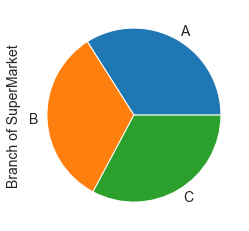

In [37]:
sales2.groupby('Branch').size().plot(kind='pie')
plt.ylabel('Branch of SuperMarket')
sales2.groupby('Branch').size()

This graph shows sales done by Each branch of Supermarket in different cities through a pie chart.
Branch wise sales analysis helps by comparing sales of different branch through which we can get common variables affecting sales and improvise them. For example A scheme that is popular in Branch A is not working in Branch B. We can improvise or create a new scheme for Branch B. 

**2. Gender of Customers** - This Graph show that there is almost equal no of customers for both genders

Gender
Female    501
Male      499
dtype: int64

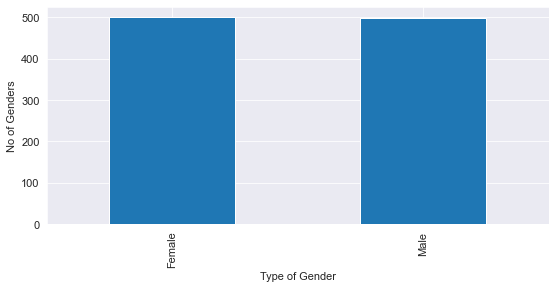

In [44]:
sales2.groupby('Gender').size().plot(kind='bar')
plt.ylabel('No of Genders')
plt.xlabel('Type of Gender')
sales2.groupby('Gender').size()

Gender is one of the most basic components you can use to understand who your customers are and how they use your products. It is a key component in developing a solid marketing strategy, and a good marketing strategy can lead to an increase in sales.

Customer Gender can detect the gender of current and future customers. All you have to do is import your customers. You can attempt to detect genders individually, in a batch, or for your entire store.


**3. Number of members vs normal customers** - This one shows graph representing members vs normal customers

Customer_type
Member    501
Normal    499
dtype: int64

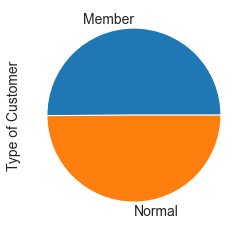

In [39]:
sales2.groupby('Customer_type').size().plot(kind='pie')
plt.ylabel('Type of Customer')
sales2.groupby('Customer_type').size()

Customer membership programs and rebate programs are initiatives sponsored by retailers and/or third parties that provide benefits to identified customers.  The customer membership programs involve registering consumers and, optionally charging them a fee to receive special rewards.  Rewards are benefits that may be earned and accumulated over time for subsequent redemption (deferred rewards) or they may be benefits that are earned and redeemed as discounts in the same transaction (instant rewards).

It can also be used to measure Customer Loyalty. Customer loyalty is a customer's willingness to repeatedly return to a company to conduct business. This is typically due to the delightful and remarkable experiences they have with that brand.

**4. Types of Product Lines currently selling** - This represent types of Product lines being purchased by customers

Product_line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
dtype: int64

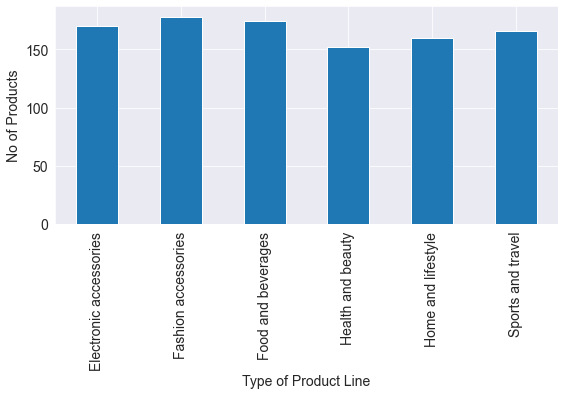

In [41]:
sales2.groupby('Product_line').size().plot(kind='bar')
plt.ylabel('No of Products')
plt.xlabel('Type of Product Line')
sales2.groupby('Product_line').size()

This Bra graph show sales of products belonging to a particular product line.

A product line is a group of related products all marketed under a single brand name that is sold by the same company. Companies sell multiple product lines under their various brand names, seeking to distinguish them from each other for better usability for consumers.

Companies often expand their offerings by adding to existing product lines because consumers are more likely to purchase products from brands with which they are already familiar.

**5. Total Branch wose sales** - This represents total sales done by differnet Branches.

CSum - Cummulative Sum of sales

In [42]:
Csum = []
Csum.append(sales2.loc[sales2['Branch'] == 'A', 'Total'].sum())
Csum.append(sales2.loc[sales2['Branch'] == 'B', 'Total'].sum())
Csum.append(sales2.loc[sales2['Branch'] == 'C', 'Total'].sum())
CSum = [round(num, 1) for num in Csum]
CSum

[106200.4, 106197.7, 110568.7]

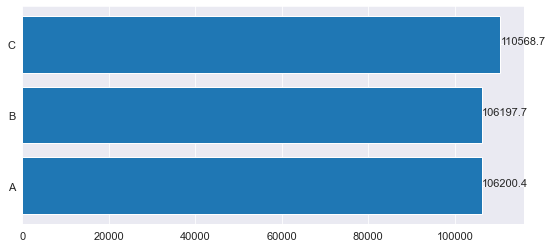

In [43]:
Market_Branch = ['A','B','C']
matplotlib.rcParams['font.size'] = 11
plt.barh(Market_Branch, CSum)
 
for index, value in enumerate(CSum):
    plt.text(value, index,
             str(value))
 
plt.show()

Total branch wise sales gives us the sum total of sales done by a Branch. It is helpful when taking care of finances of a Branch and during inventory management. Having a predicted figure is better than having no information at all. By this we can pre-order some items which take time or run out quickly.

Let us save and upload our work to Jovian before continuing

In [1]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Asking and Answering Questions

Here we will be using numpy and pands for answering some questions.
The questios are as follows :
1. Which Branch is most popular and what is its most popular product line?
2. Which is most popular product line bought by female customers?
3. Which is most popular product line bought by male customers?
4. What is the difference between average ratings given by male and female customers?
5. What is the difference between average ratings given by members and normal customers ?
6. Show a graph which represents payment options used by customers.


In [45]:
sales3= sales2[['Customer_type','Gender','City','Branch','Product_line','Unit_price','Quantity','Total','Rating']]

In [46]:
sales3.head(10)

,Customer_type,Gender,City,Branch,Product_line,Unit_price,Quantity,Total,Rating
856,Normal,Male,Mandalay,B,Food and beverages,21.12,8,177.408,6.3
567,Normal,Female,Yangon,A,Fashion accessories,65.74,9,621.243,7.7
245,Member,Male,Yangon,A,Home and lifestyle,47.59,8,399.756,5.7
696,Member,Female,Yangon,A,Sports and travel,27.04,4,113.568,6.9
523,Normal,Male,Naypyitaw,C,Health and beauty,62.87,2,132.027,5.0
829,Member,Female,Yangon,A,Electronic accessories,74.22,10,779.310,4.3
496,Normal,Female,Naypyitaw,C,Electronic accessories,63.22,2,132.762,8.5
970,Member,Female,Mandalay,B,Food and beverages,84.63,10,888.615,9.0
484,Member,Female,Naypyitaw,C,Sports and travel,36.98,10,388.290,7.0
17,Normal,Male,Yangon,A,Sports and travel,72.61,6,457.443,6.9


In [50]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

This is for removing truncation while printing result. 

For example truncated string : Home and lifestyle is the most popular Product ...

full string example : Home and lifestyle is the most popular Product line in Branch A

#### Q1: Most Popular Product line in Most popular Branch 

In [45]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [51]:
s = (sales3['Product_line'][sales3.Branch=='A'].mode() + " is the most popular Product line in Branch " + sales3['Branch'].mode())

print(s.to_string(index=False, dtype=False))

Home and lifestyle is the most popular Product line in Branch A


This Question helps by finding most popular product line sold by most popular branch. We can use this data during sales or other events to highlight that product line. This is a good example of making strong points more strong.
Here The most popular Branch is **A** and most products sold by this branch are of **Home and Lifestyle Product line**.

#### Q2: Female Most popular Product line 

In [56]:
a = (sales3['Product_line'][sales3.Gender == 'Female'].mode() + " is the most popular product line used by Female Customers" )

print(a.to_string(index=False, dtype=False))

Fashion accessories is the most popular product line used by Female Customers


This question is to find product line which is bought by **Female** customer and is sold the most. We can see **Fashion accessories** is the product line bought by females the most. 

This kind of data is helpful while generalizing data on basis of genders to find a possible trend or pattern which can be used in further management to increase sales.

#### Q3: Male most popular Product line 

In [52]:
b = (sales3['Product_line'][sales3.Gender == 'Male'].mode() + " is the most popular product line used by Male Customers" )

print(b.to_string(index=False, dtype=False))

Health and beauty is the most popular product line used by Male Customers


This question is to find product line which is bought by **Male customer** and is sold the most. We can see product belonging to **Health and Beauty** product line are bouth the most by male customers.

This kind of data is helpful while generalizing data on basis of genders to find a possible trend or pattern which can be used in further management to increase sales.

#### Q4: Rating given by customers who are members - Females vs Males

In [53]:
c = str(sales3['Rating'][sales3.Gender== 'Male'].mean())
print("The Average rating given by male customers is " + c)

The Average rating given by male customers is 6.980961923847705


In [54]:
d =  str(sales3['Rating'][sales3.Gender== 'Female'].mean())
print("The Average rating given by Female customers is " + d)

The Average rating given by Female customers is 6.964471057884226


In this question we can see comparison of average of ratings given by customers of different genders.

**The averge rating of female customers : 6.964471057884226**  
**The averge rating of male customers    : 6.980961923847705**

This kind of result indicates male customers are easier to satisfy than compared to female customers.
This kind of data is helpful while generalizing data on basis of genders to find a possible trend or pattern which can be used in further management to increase sales.

#### Q5: Average Ratings given by Members vs Normal Customers

In [55]:
e = str(sales3['Rating'][sales3.Customer_type == 'Member'].mean())
f = str(sales3['Rating'][sales3.Customer_type == 'Normal'].mean())
print("Average rating given by Members is - " + e )
print("Average rating given by Normal Customers - " + f)

Average rating given by Members is - 6.940319361277448
Average rating given by Normal Customers - 7.005210420841684


In this question we compare average of ratings given by customers who are members to those who are not members.

**Average rating given by Members is - 6.940319361277448**

**Average rating given by Normal Customers - 7.005210420841684**


This kind of data is used while taking measure of customer loyalty generally.

#### Q6: Graph representing Payment Options

Payment
Cash           344
Credit card    311
Ewallet        345
dtype: int64

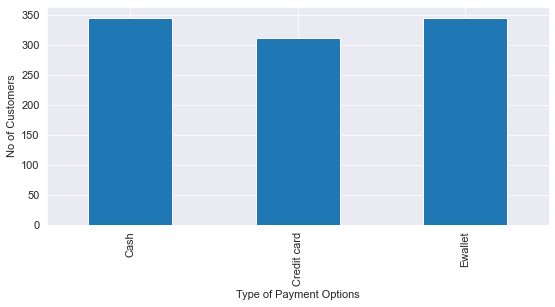

In [74]:
sales_df.groupby('Payment').size().plot(kind='bar')
plt.ylabel('No of Customers')
plt.xlabel('Type of Payment Options')
sales_df.groupby('Payment').size()

Here a Bar graph is used to represent the payment methods used by customers. 
This kind of data hepls in finding current trends and patterns.

**Cash users : 344** 

**Credit card users : 311** 

**Ewallet users : 345**

Let us save and upload our work to Jovian before continuing.

In [75]:
import jovian

In [76]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "polaris-codev/zerotopandas-course-project-supermarket-sales" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/polaris-codev/zerotopandas-course-project-supermarket-sales


'https://jovian.ai/polaris-codev/zerotopandas-course-project-supermarket-sales'

## Inferences and Conclusion

From the above analysis and visualization, we can understand these following points :
1. Branch A is most popular
2. There are more female customers in comparison to males
3. Alomst 50% customers are members (501 out of 1000)
4. Fashion accessories are most popular and Health and beauty are least popular product lines
5. Total sales done by branches are A = 106200.4, B = 106197.7, C = 110568.7 
6. Home and lifestyle is the most popular Product line in Branch A
7. Fashion accessories is the most popular product line used by Female Customers
8. Health and beauty is the most popular product line used by Male Customers
9. The Average rating given by Female customers vs Male customers is 6.964 vs 6.980
10. Average rating given by Normal Customers vs Members is 7.005 vs 6.940
11. Ewallet is most popular payment method with almost equal to Cash

In [57]:
import jovian

In [58]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "polaris-codev/zerotopandas-course-project-supermarket-sales" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/polaris-codev/zerotopandas-course-project-supermarket-sales


'https://jovian.ai/polaris-codev/zerotopandas-course-project-supermarket-sales'

## References and Future Work

**Future work**

This study on this dataset can further be extended in future by adding more Branches in different countries. By this we can analyze Customer's trends and moods which can help before filling the inventory.
This study can also help in online E-commerce analysis.

**References**:

Matplotlib documentation: https://matplotlib.org/stable/gallery/
Seaborn documentation: https://seaborn.pydata.org/tutorial.html
Pandas documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
Numpy documentation: https://numpy.org/doc/
Dataset: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?resource=download


In [32]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>